<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%9A%D0%B5%D0%B9%D1%81_%D0%A1%D1%82%D0%B0%D0%B4%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Статистика. Практика"

In [25]:
# импорт библиотек

import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import itertools
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [26]:
#  загрузим данные

param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/дз_7/'

file = 'vgsales.csv'

df_vgsales= pd.read_csv(f'{param}{file}', sep = ',')
df_vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#  изучим датасет:
df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [28]:
# в рамках нашей задачи, будем рассматривать данные в срезе: платформы видеоприставок, жанра игры, оценок критиков
# преобразуем датафрейм

df_games = df_vgsales[[ 'Platform', 'Genre', 'Critic_Score']]
df_games.head()

,Platform,Genre,Critic_Score
0,Wii,Sports,76.0
1,NES,Platform,NaN
2,Wii,Racing,82.0
3,Wii,Sports,80.0
4,GB,Role-Playing,NaN


In [29]:
# преобразуем все категории к одному регистру
list_name = ['Platform', 'Genre']

for colum in list_name:
  df_games[colum] = df_games[colum].apply(lambda x: str(x).capitalize() )

df_games.head()

<ipython-input-29-51d1ee505aae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games[colum] = df_games[colum].apply(lambda x: str(x).capitalize() )


,Platform,Genre,Critic_Score
0,Wii,Sports,76.0
1,Nes,Platform,NaN
2,Wii,Racing,82.0
3,Wii,Sports,80.0
4,Gb,Role-playing,NaN


2) АВ-тест:
* Как критики относятся к спортивным играм?

In [30]:
# сформируем датафрейм по оценкам критиков: игры жанра спорт и все остальные игры
df_critic_sport = df_games[ df_games['Genre'] =='Sports']['Critic_Score']
df_critic_all = df_games[ df_games['Genre'] !='Sports']['Critic_Score']

# df_critic_sport.head()
df_critic_all.head()

1     NaN
2    82.0
4     NaN
5     NaN
6    89.0
Name: Critic_Score, dtype: float64

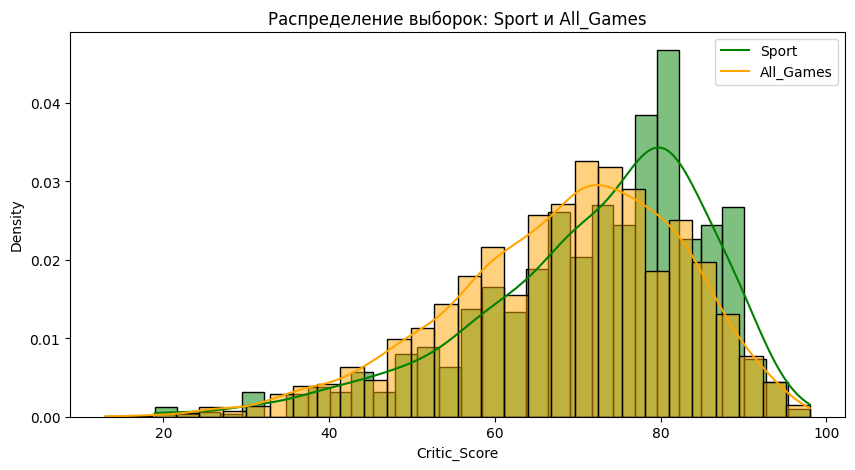

In [31]:
# гистограмма распределения

plt.figure(figsize=(10,5))

sns.histplot(data=df_critic_sport , kde=True, bins=30, stat="density", color='green')
sns.histplot( data=df_critic_all, kde=True, bins=30, stat="density", color='orange')
plt.title('Распределение выборок: Sport и All_Games')
plt.legend(['Sport','All_Games'])
plt.show()

In [32]:
# сформируем и проверим гипотезу:
# Н0 - Критики одинаково относятся к спортивным играм и ко всем остальным (выборки одинаковы)
# Н1 - Отношение критиков к спортивным играм отличается от других игр (выборки разные)

# T-критерий Уэлча: что обе группы данных отобраны из совокупностей, которые следуют нормальному распределению, но эти две совокупности могут иметь не одинаковую дисперсию.
alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind(df_critic_sport, df_critic_all, equal_var= False, nan_policy='omit') # пропустим строки NaN

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > alfa:
    print('Не отклоняем нулевую гипотезу, критики одинаково относятся к спортивным играм и ко всем остальным')
else:
    print('Отклоняем нулевую гипотезу, отношение критиков к спортивным играм отличается от других игр')

print('Игры Sport:')
print(f"Стандартное отклонение: {df_critic_sport.std():.3f}")
print(f"Среднее: {df_critic_sport.mean():.3f}")
print('\nДругик игры:')
print(f"Стандартное отклонение: {df_critic_all.std():.3f}")
print(f"Среднее: {df_critic_all.mean():.3f}")

Статистика = 8.08699, p = 0.00000
Отклоняем нулевую гипотезу, отношение критиков к спортивным играм отличается от других игр
Игры Sport:
Стандартное отклонение: 13.878
Среднее: 71.968

Другик игры:
Стандартное отклонение: 13.884
Среднее: 68.452


In [33]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента
# сформируем и проверим гипотезу:
# Н0 - Критикам больше нравятся сопртивные игры (среднее 1 > среднее 2)
# Н1 - Критикам больше нравятся игры других жанров (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( df_critic_sport, df_critic_all,  alternative='greater', nan_policy='omit') # пропустим строки NaN

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Критикам больше нравятся сопртивные игры (среднее 1 > среднее 2)')
else:
    print(' Критикам больше нравятся игры других жанров (среднее 1 < среднее 2)')

Статистика = 8.08461, p = 0.0000000000
 Критикам больше нравятся игры других жанров (среднее 1 < среднее 2)


3) АВ-тест:
 - Критикам нравятся больше игры на PC или на PS4?

In [34]:
# сформируем датафрейм по оценкам критиков: платформа PS4 и РС
df_critic_pc = df_games[ df_games['Platform'] =='Pc']['Critic_Score']
df_critic_ps4 = df_games[ df_games['Platform'] =='Ps4']['Critic_Score']

# df_critic_pc.head()
df_critic_ps4.head()

31     NaN
42    97.0
77    82.0
87     NaN
92    83.0
Name: Critic_Score, dtype: float64

Статистика = 4.54411, p = 0.0000031079
Критикам больше нравятся игры на PS4, чем на на PC (среднее 1 < среднее 2)
Игры на PC:
Стандартное отклонение: 11.171
Среднее: 75.929

Игры на PS4:
Стандартное отклонение: 12.486
Среднее: 72.091


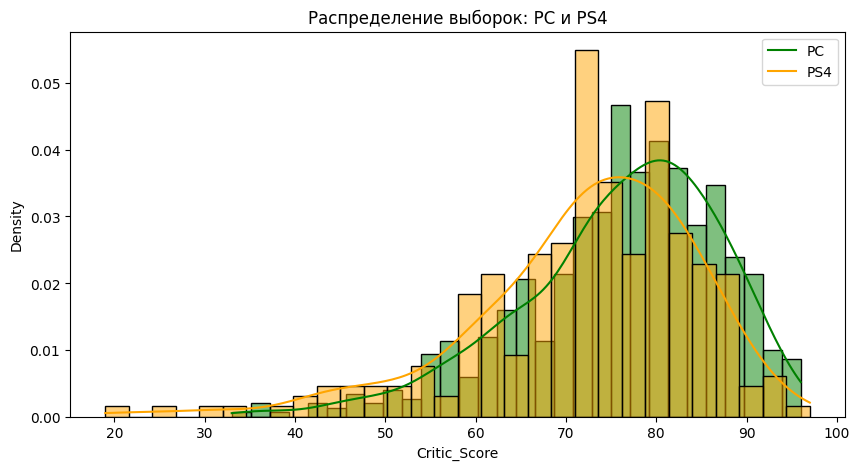

In [35]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента
# сформируем и проверим гипотезу:
# Н0 - Критикам больше нравятся игры на PC, чем на PS4 (среднее 1 > среднее 2)
# Н1 - Критикам больше нравятся игры на PS4, чем на на PC (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( df_critic_pc, df_critic_ps4, alternative='greater', nan_policy='omit') # пропустим строки NaN

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Критикам больше нравятся игры на PC, чем на PS4(среднее 1 > среднее 2)')
else:
    print('Критикам больше нравятся игры на PS4, чем на на PC (среднее 1 < среднее 2)')

print('Игры на PC:')
print(f"Стандартное отклонение: {df_critic_pc.std():.3f}")
print(f"Среднее: {df_critic_pc.mean():.3f}")
print('\nИгры на PS4:')
print(f"Стандартное отклонение: {df_critic_ps4.std():.3f}")
print(f"Среднее: {df_critic_ps4.mean():.3f}")

# гистограмма распределения

plt.figure(figsize=(10,5))

sns.histplot(data=df_critic_pc , kde=True, bins=30, stat="density", color='green')
sns.histplot( data=df_critic_ps4, kde=True, bins=30, stat="density", color='orange')
plt.title('Распределение выборок: PC и PS4')
plt.legend(['PC','PS4'])
plt.show()


4) АВ-тест:
 - Критикам больше нравятся стрелялки или стратегии?

In [36]:
# сформируем датафрейм по оценкам критиков: платформа PS4 и РС
df_critic_strateg = df_games[ df_games['Genre'] =='Shooter']['Critic_Score']
df_critic_shoot = df_games[ df_games['Genre'] =='Strategy']['Critic_Score']

# df_critic_strateg.head()
df_critic_shoot.head()

168     NaN
206     NaN
218    93.0
273     NaN
339     NaN
Name: Critic_Score, dtype: float64

Статистика = 2.06670, p = 0.0194843565
Критикам больше нравятся игры Strategy, чем Shooter (среднее 1 < среднее 2)
Игры Shooter:
Стандартное отклонение: 11.828
Среднее: 72.086

Игры Strategy:
Стандартное отклонение: 14.553
Среднее: 70.181


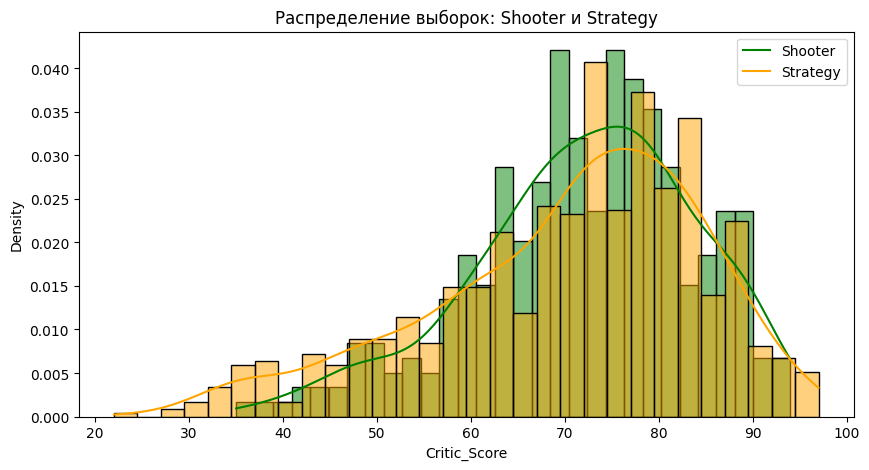

In [37]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента
# сформируем и проверим гипотезу:
# Н0 - Критикам больше нравятся игры Shooter, чем Strategy (среднее 1 > среднее 2)
# Н1 - Критикам больше нравятся игры Strategy, чем Shooter (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( df_critic_shoot, df_critic_strateg, alternative='greater', nan_policy='omit') # пропустим строки NaN

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Критикам больше нравятся игры Shooter, чем Strategy (среднее 1 > среднее 2)')
else:
    print('Критикам больше нравятся игры Strategy, чем Shooter (среднее 1 < среднее 2)')

print('Игры Shooter:')
print(f"Стандартное отклонение: {df_critic_shoot.std():.3f}")
print(f"Среднее: {df_critic_shoot.mean():.3f}")
print('\nИгры Strategy:')
print(f"Стандартное отклонение: {df_critic_strateg.std():.3f}")
print(f"Среднее: {df_critic_strateg.mean():.3f}")

# гистограмма распределения

plt.figure(figsize=(10,5))

sns.histplot(data=df_critic_shoot , kde=True, bins=30, stat="density", color='green')
sns.histplot( data=df_critic_strateg, kde=True, bins=30, stat="density", color='orange')
plt.title('Распределение выборок: Shooter и Strategy')
plt.legend(['Shooter','Strategy'])
plt.show()

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [38]:
# import glob
# import pandas as pd
import re

import nltk
from nltk.corpus import stopwords

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim import corpora
from gensim.models import TfidfModel
from gensim import similarities


from sklearn.feature_extraction.text import TfidfVectorizer


In [39]:
#  загрузим данные

param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/дз_7/'

file = 'spam.csv'

df_spam= pd.read_csv(f'{param}{file}', sep = ',')
df_spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
# 1) поработаем с данными:
#  - переведем текст в один регистр
#  - очистим от лишних (мусорных)слов/симвлов
#  - приведем слова к нормальной форме

pat = r'[\W\d_]+' # кроме букв, спец симполов, цифр

# список стоп-слов из библиотеки NLTK
nltk.download('stopwords')
stop_word = set(stopwords.words('english'))

# нормальная форма слов из библиотеки NLTK
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def test_conversion (message):

  # приведем к одному регистру/ уберем лишний мусор/ разделим текст на слова
  message = re.sub( pat, ' ', message.lower() ).split()

  # удаляем стоп-слова
  without_word = [word for word in message if word not in stop_word]

  # приводим слова к нормальной форме
  lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in without_word ]

  # переведем список в строку, чтобы применить TfidfVectorizer
  text = ','.join(lemmatized_word)

  return text

df_spam['word_in_message'] = df_spam['Message'].apply(test_conversion)

df_spam.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Category,Message,word_in_message
0,ham,"Go until jurong point, crazy.. Available only ...","go,jurong,point,crazy,available,bugis,n,great,..."
1,ham,Ok lar... Joking wif u oni...,"ok,lar,joking,wif,u,oni"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"free,entry,wkly,comp,win,fa,cup,final,tkts,st,..."
3,ham,U dun say so early hor... U c already then say...,"u,dun,say,early,hor,u,c,already,say"
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah,think,go,usf,life,around,though"


In [41]:
# 5) Преобразую все сообщения в вектора TF-IDF:

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam['word_in_message'])
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix.head()

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# 6) построим модель логистической регрессии

#  переведем столбец Category в числовой формат

df_spam['id_category'] = df_spam['Category'].apply(lambda x: 0 if x == 'spam' else 1)
df_spam.head()

,Category,Message,word_in_message,id_category
0,ham,"Go until jurong point, crazy.. Available only ...","go,jurong,point,crazy,available,bugis,n,great,...",1
1,ham,Ok lar... Joking wif u oni...,"ok,lar,joking,wif,u,oni",1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"free,entry,wkly,comp,win,fa,cup,final,tkts,st,...",0
3,ham,U dun say so early hor... U c already then say...,"u,dun,say,early,hor,u,c,already,say",1
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah,think,go,usf,life,around,though",1


In [43]:
# разделяем выборку на тренировочную и тестовую

data_target = np.array(df_spam['id_category']) # целевая выборка

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data_target, test_size=0.3, random_state=42)

# построим модель предсказания, с помощью логистической регрессии

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [44]:
# делаем прогноз на тестовой выборке

y_pred = lr.predict(X_test)
print(f' y_pred = {y_pred}')

 y_pred = [1 1 1 ... 1 0 1]


In [45]:
# разница факта и прогноза
df_result = pd.DataFrame( [y_test, y_pred]).transpose()
df_result.columns =['test', 'pred']

df_result.head()

,test,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [46]:
# точность модели

print( 'accuracy', accuracy_score(y_test, lr.predict(X_test) ) )
print( 'precision', precision_score(y_test, lr.predict(X_test), average='weighted') )
print( 'recall', recall_score(y_test, lr.predict(X_test), average='weighted') )
print( 'f1', f1_score(y_test, lr.predict(X_test), average='weighted' ) )

accuracy 0.9599282296650717
precision 0.9608040935510411
recall 0.9599282296650717
f1 0.9571834391599038


Точность модели (логистическая регрессия):
 - общая точность модели довльно высокая accuracy = 0,959, значение F-мера =0,957. Модель будет хорошо делать предсказания по входящим сообщениям "спам/ не спам"

Confusion matrix, without normalization
[[ 160   64]
 [   3 1445]]


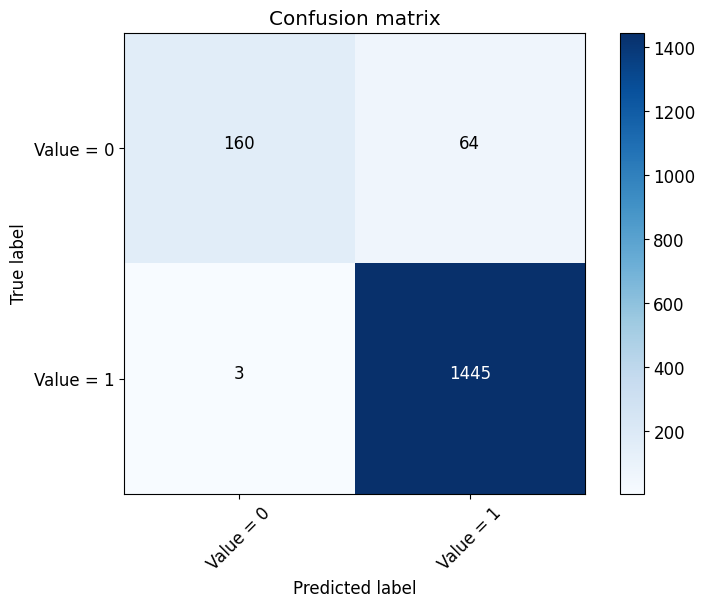

In [47]:
# 7) Опишите результаты при помощи confusion_matrix

#  матрица ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 12}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Value = 0', 'Value = 1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Построена матрица ошибок для нашей модели линейной регрессии:
 Ошибка I рода - модель поместит, ошибочно, 3 сообщения в "Спам".
 Ошибка II рода - модель пропустит 64 сообщения, как " Не спам"

In [48]:
# 8) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

# сформируем датафрейм по тестовой выборке
df_pred = X_test

# добавим столбец с предсказанием из модели
df_pred['category_pred'] = y_pred

#  вернем текстовое описание для столюца с предсказаниями
df_pred['category_pred'] =df_pred['category_pred'].apply(lambda x: 'spam' if x == 0 else 'ham')

# объеденим с исходным датафреймом, получим текст сообщений и прафильные классификации
df_res = pd.merge(df_pred['category_pred'], df_spam[['Message', 'Category' ]], left_index=True, right_index=True)

# оставим строки с ошибочными предсказаниями
df_res = df_res[ (df_res['category_pred'] == 'spam') & (df_res['Category'] == 'ham') | \
                (df_res['category_pred'] == 'ham') & (df_res['Category'] == 'spam')]

print('кол-во строк:', len(df_res))
df_res.head()

кол-во строк: 67


,category_pred,Message,Category
2952,spam,Hey now am free you can call me.,ham
881,ham,Reminder: You have not downloaded the content ...,spam
1961,ham,Guess what! Somebody you know secretly fancies...,spam
3864,ham,Oh my god! I've found your number again! I'm s...,spam
2575,ham,Your next amazing xxx PICSFREE1 video will be ...,spam


In [49]:
#  модель LDA - построим модель прогноза LDA (Линейный дискриминантный анализ)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# обучаем модель на той же выборке и получаем коэфф. модели

x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(tfidf_matrix, data_target, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_lda, y_train_lda)

print(f'коэфф модели:\n{lda.coef_[0]}')

коэфф модели:
[-1.35410189e-13 -6.39045793e+02  5.39876686e+01 ... -4.68666248e+01
 -2.40586821e+02  0.00000000e+00]


In [50]:
# делаем прогноз на тестовой выборке

y_pred_lda = lda.predict(x_test_lda)
print(f' y_pred_lda = {y_pred_lda}')

 y_pred_lda = [1 1 1 ... 1 1 1]


In [ ]:
# точность модели

print( 'accuracy', accuracy_score(y_test_lda, y_pred_lda) )
print( 'f1', f1_score(y_test_lda, y_pred_lda, average='weighted') )

accuracy 0.9156698564593302
f1 0.9179424660616244


In [52]:
#  модель случайного леса Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [55]:
# Реализация поиска по сетке - гиперпараметры модели

from sklearn.model_selection import GridSearchCV

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV( rf, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

print('Параметры модели: ' + str(model_grid.best_params_))
print('Точность модели: ' + str(model_grid.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Параметры модели: {'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Точность модели: 0.9653846153846154


In [54]:
# Реализация случайного поиска параметров модели

from scipy.stats import randint

#  гиперпараметры модели
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,y_train)

print('Параметры модели: ' + str(model_random.best_params_) )
print('Точность модели: ' + str(model_random.best_score_) )

Параметры модели: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 410}
Точность модели: 0.9641025641025641


Точность модели RF(случайного леса) = 0,965. Это незначительно выше чем у LR (Линейная регрессия) = 0,959. Модель LDA (Линейный дискриминантный анализ) показала самый слабый результат = 0,915.
При незначильном отличии по точности моделей LR и RF, модель FR значительно дольше обучается.